# About the Model

The classification of emails into "ham" (non-spam) and "spam" categories is a crucial task in email filtering systems. One effective approach for this task is using the k-nearest neighbors (KNN) algorithm. KNN is a popular supervised machine learning algorithm that can be applied to classify emails based on their features and similarities to existing labeled examples.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [30]:
df= pd.read_csv('spam.csv')

In [31]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


# Replacing the null values with an empty string

In [32]:
df= df.where(pd.notnull(df),'')

In [33]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [34]:
df.isna().sum()

Category    0
Message     0
dtype: int64

# Visualizing the categorical variables

[Text(0, 0, '4825'), Text(0, 0, '747')]

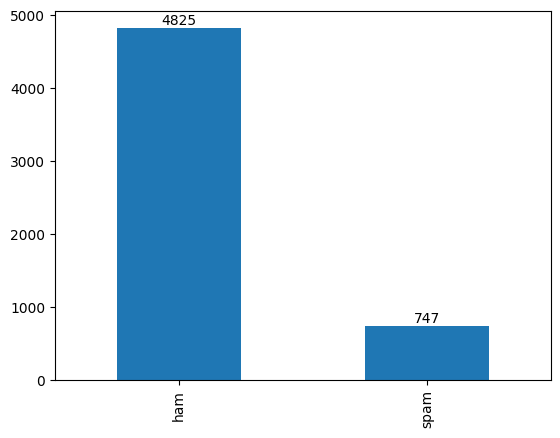

In [35]:
barplot= df.Category.value_counts().plot(kind='bar')
barplot.bar_label(barplot.containers[0])

# Feature engineering

# Encoding trhe categorical variables(feature scaling)

In [80]:
df.Category.replace({'ham':0 ,'spam':1},inplace= True)

In [51]:
print(df)

      Category                                            Message
0            0  Go until jurong point, crazy.. Available only ...
1            0                      Ok lar... Joking wif u oni...
2            1  Free entry in 2 a wkly comp to win FA Cup fina...
3            0  U dun say so early hor... U c already then say...
4            0  Nah I don't think he goes to usf, he lives aro...
...        ...                                                ...
5567         1  This is the 2nd time we have tried 2 contact u...
5568         0               Will ü b going to esplanade fr home?
5569         0  Pity, * was in mood for that. So...any other s...
5570         0  The guy did some bitching but I acted like i'd...
5571         0                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [52]:
df.Category.dtypes

dtype('int64')

# Segregation of Dependent and independent variables

In [54]:
X = df.Message
Y= df.Category

In [55]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [56]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64


# Splitting training and testing data

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 3)

In [59]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


# Feature extraction provides a score on the basis of arguments provided inside the bracket

In [60]:
feature_extraction= TfidfVectorizer(min_df= 1, stop_words= 'english', lowercase= True)

In [61]:
Y_train

3075    0
1787    0
1614    0
4304    0
3266    1
       ..
789     1
968     0
1667    0
3321    0
1688    1
Name: Category, Length: 4457, dtype: int64

In [62]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


In [63]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [64]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

# Training the model

In [68]:
model= KNeighborsClassifier(n_neighbors=3)

In [69]:
model.fit(X_train_features, Y_train)

KNeighborsClassifier(n_neighbors=3)

# Checking accuracy on train data

In [70]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [71]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9466008525914292


# Checking accuracy on test data

In [72]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [73]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9237668161434978


# The accuracy score on both the train and test data are above 90% which signifies a higher reliability.

# Actual prediction

In [76]:
input_mail= ["Congratulations! You've been selected for an exclusive opportunity to claim a limited-time offer. Act now to enjoy incredible discounts and benefits. Don't miss out on this amazing deal! Respond today to secure your spot."]

In [77]:
input_mail_features = feature_extraction.transform(input_mail)

In [78]:
result= model.predict(input_mail_features)

In [79]:
if result == 0:
    print("This is a Ham mail")
else:
    print("This is a Spam mail")

This is a Ham mail


Source of the dataset: https://www.kaggle.com/datasets/mfaisalqureshi/spam-email